In [2]:
#基本工具
import numpy as np
import pandas as pd
import time
import os #修改环境设置
import random
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import cross_validate, KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score as ACC #当返回具体类别时，可以使用准确率
from sklearn.metrics import log_loss as logloss #当返回概率时，则必须使用交叉熵损失
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.linear_model import LogisticRegression as LogiR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
# 自定义模块
from telcoFunc import *
# 导入特征衍生模块
import features_creation as fc
from features_creation import *
from tqdm import tqdm
import gc
#日常使用库与算法
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import time
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
#导入优化算法
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss
#融合模型
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\shenxiaochen\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
data = pd.read_csv("./6_1data_exp_shifted.csv",index_col=0)

data_test=pd.read_csv('./6_1data_exp_test_shifted.csv',index_col=0)

features = data.drop(columns='group').copy()
labels = data['group'].copy()

features_test = data_test.drop(columns='group').copy()
labels_test = data_test['group'].copy()

shift_gene=['ENSG00000164600.4', 'ENSG00000095970.12', 'ENSG00000171860.4',
       'ENSG00000135914.5', 'ENSG00000075275.12','ENSG00000131095.7']

features_keep_test=features_test.loc[:,shift_gene]

features_keep=features.loc[:,shift_gene]

scaler = StandardScaler()

scall=scaler.fit(features_keep)

ff_keep=scall.transform(features_keep)

ff_keep_test=scall.transform(features_keep_test)

ff_keep=pd.DataFrame(ff_keep)

ff_keep.columns=shift_gene

ff_keep_test=pd.DataFrame(ff_keep_test)

ff_keep_test.columns=shift_gene

Poly_train, Poly_test, colNames_train_new, colNames_test_new = Polynomial_Features(shift_gene, 
                                                                                   3, 
                                                                                   ff_keep, 
                                                                                   ff_keep_test, 
                                                                                   multi=False)

MI = mutual_info_classif(Poly_train, labels, random_state=1412)


MI_threshold = MI.mean() * 0.1

MI_Ploy_cols = []

for MIvalue, colname in zip(MI, colNames_train_new):
    if MIvalue > MI_threshold:
        MI_Ploy_cols.append(colname)
        
        

Poly_train=Poly_train.loc[:,MI_Ploy_cols]
Poly_test=Poly_test.loc[:,MI_Ploy_cols]
Poly_train=pd.concat([Poly_train,ff_keep],axis=1)
Poly_test=pd.concat([Poly_test,ff_keep_test],axis=1)

In [4]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import roc_auc_score, recall_score

In [5]:
dd=pd.read_csv('./test_roc.csv',index_col=0)

In [6]:
dd 

,our,cat_boost,lgb_boost,xgb,rf,svm,tree
0,0.601464,0.661677,0.555141,0.331584,0.72,0.374005,1.0
1,0.540168,0.702338,0.819047,0.964756,0.74,0.372314,0.0
2,0.520462,0.675890,0.562473,0.769898,0.66,0.372578,1.0
3,0.389297,0.313545,0.128283,0.173584,0.41,0.371534,0.0
4,0.367203,0.328434,0.156978,0.407809,0.34,0.372480,1.0
...,...,...,...,...,...,...,...
312,0.252196,0.093889,0.062543,0.010303,0.12,0.374875,0.0
313,0.479754,0.582090,0.305322,0.628655,0.54,0.372172,1.0
314,0.668439,0.862139,0.955197,0.990966,0.84,0.372481,1.0
315,0.231178,0.175186,0.074868,0.100834,0.25,0.372190,0.0


In [7]:
valid=pd.read_csv('./cross_validate.csv',index_col=0)

In [8]:
valid

,our,cat_boost,lgb_boost,xgb,rf,svm,tree
0,0.752226,0.728706,0.711001,0.690990,0.706365,0.636092,0.524961
1,0.759019,0.759574,0.747419,0.744977,0.748696,0.650239,0.636253
2,0.781336,0.771676,0.736613,0.766428,0.744335,0.654502,0.575462
3,0.782914,0.760778,0.720097,0.750211,0.750475,0.645604,0.634721
4,0.776420,0.751882,0.748531,0.742602,0.738220,0.560779,0.600577


In [9]:
valid.mean()

our          0.770383
cat_boost    0.754523
lgb_boost    0.732732
xgb          0.739042
rf           0.737618
svm          0.629443
tree         0.594395
dtype: float64

In [10]:
valid.columns=np.array(['DYSLER','Catboost','lightGBM','Xgboost','RandomForest','SVM','Decision Tree'])

In [11]:
vv=valid.melt()

In [12]:
vv.columns=np.array(['model','value_auc'])

In [13]:
vv 

,model,value_auc
0,DYSLER,0.752226
1,DYSLER,0.759019
2,DYSLER,0.781336
3,DYSLER,0.782914
4,DYSLER,0.776420
5,Catboost,0.728706
6,Catboost,0.759574
7,Catboost,0.771676
8,Catboost,0.760778
9,Catboost,0.751882


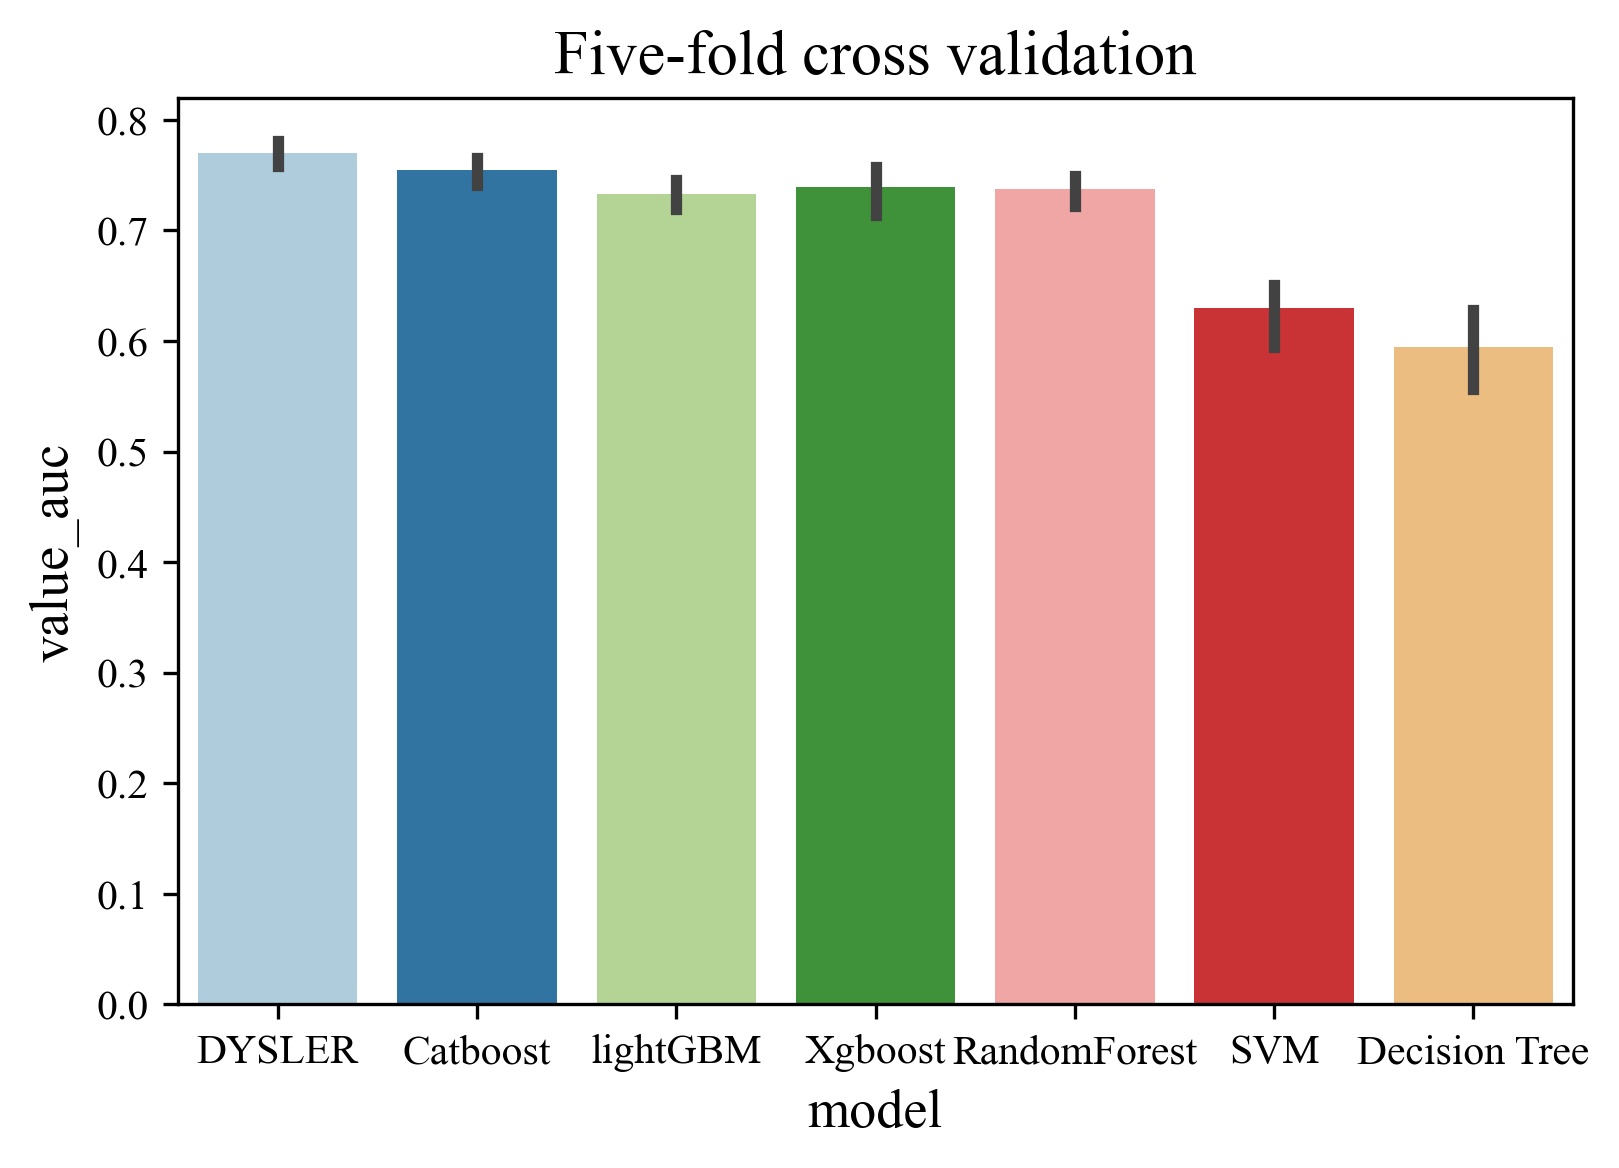

In [23]:
plt.rc('font',family='Times New Roman')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['figure.dpi'] = 300
sns.barplot(x="model", y="value_auc", data=vv,palette='Paired')
plt.xlabel('model', fontsize=13)
plt.ylabel('value_auc', fontsize=13)
plt.title('Five-fold cross validation', fontsize=15) 
plt.savefig('validation.pdf',dpi=900,bbox_inches='tight')

In [24]:
dd.columns=np.array(['DYSLER','Catboost','lightGBM','Xgboost','RandomForest','SVM','Decision Tree'])

In [25]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import roc_auc_score, recall_score

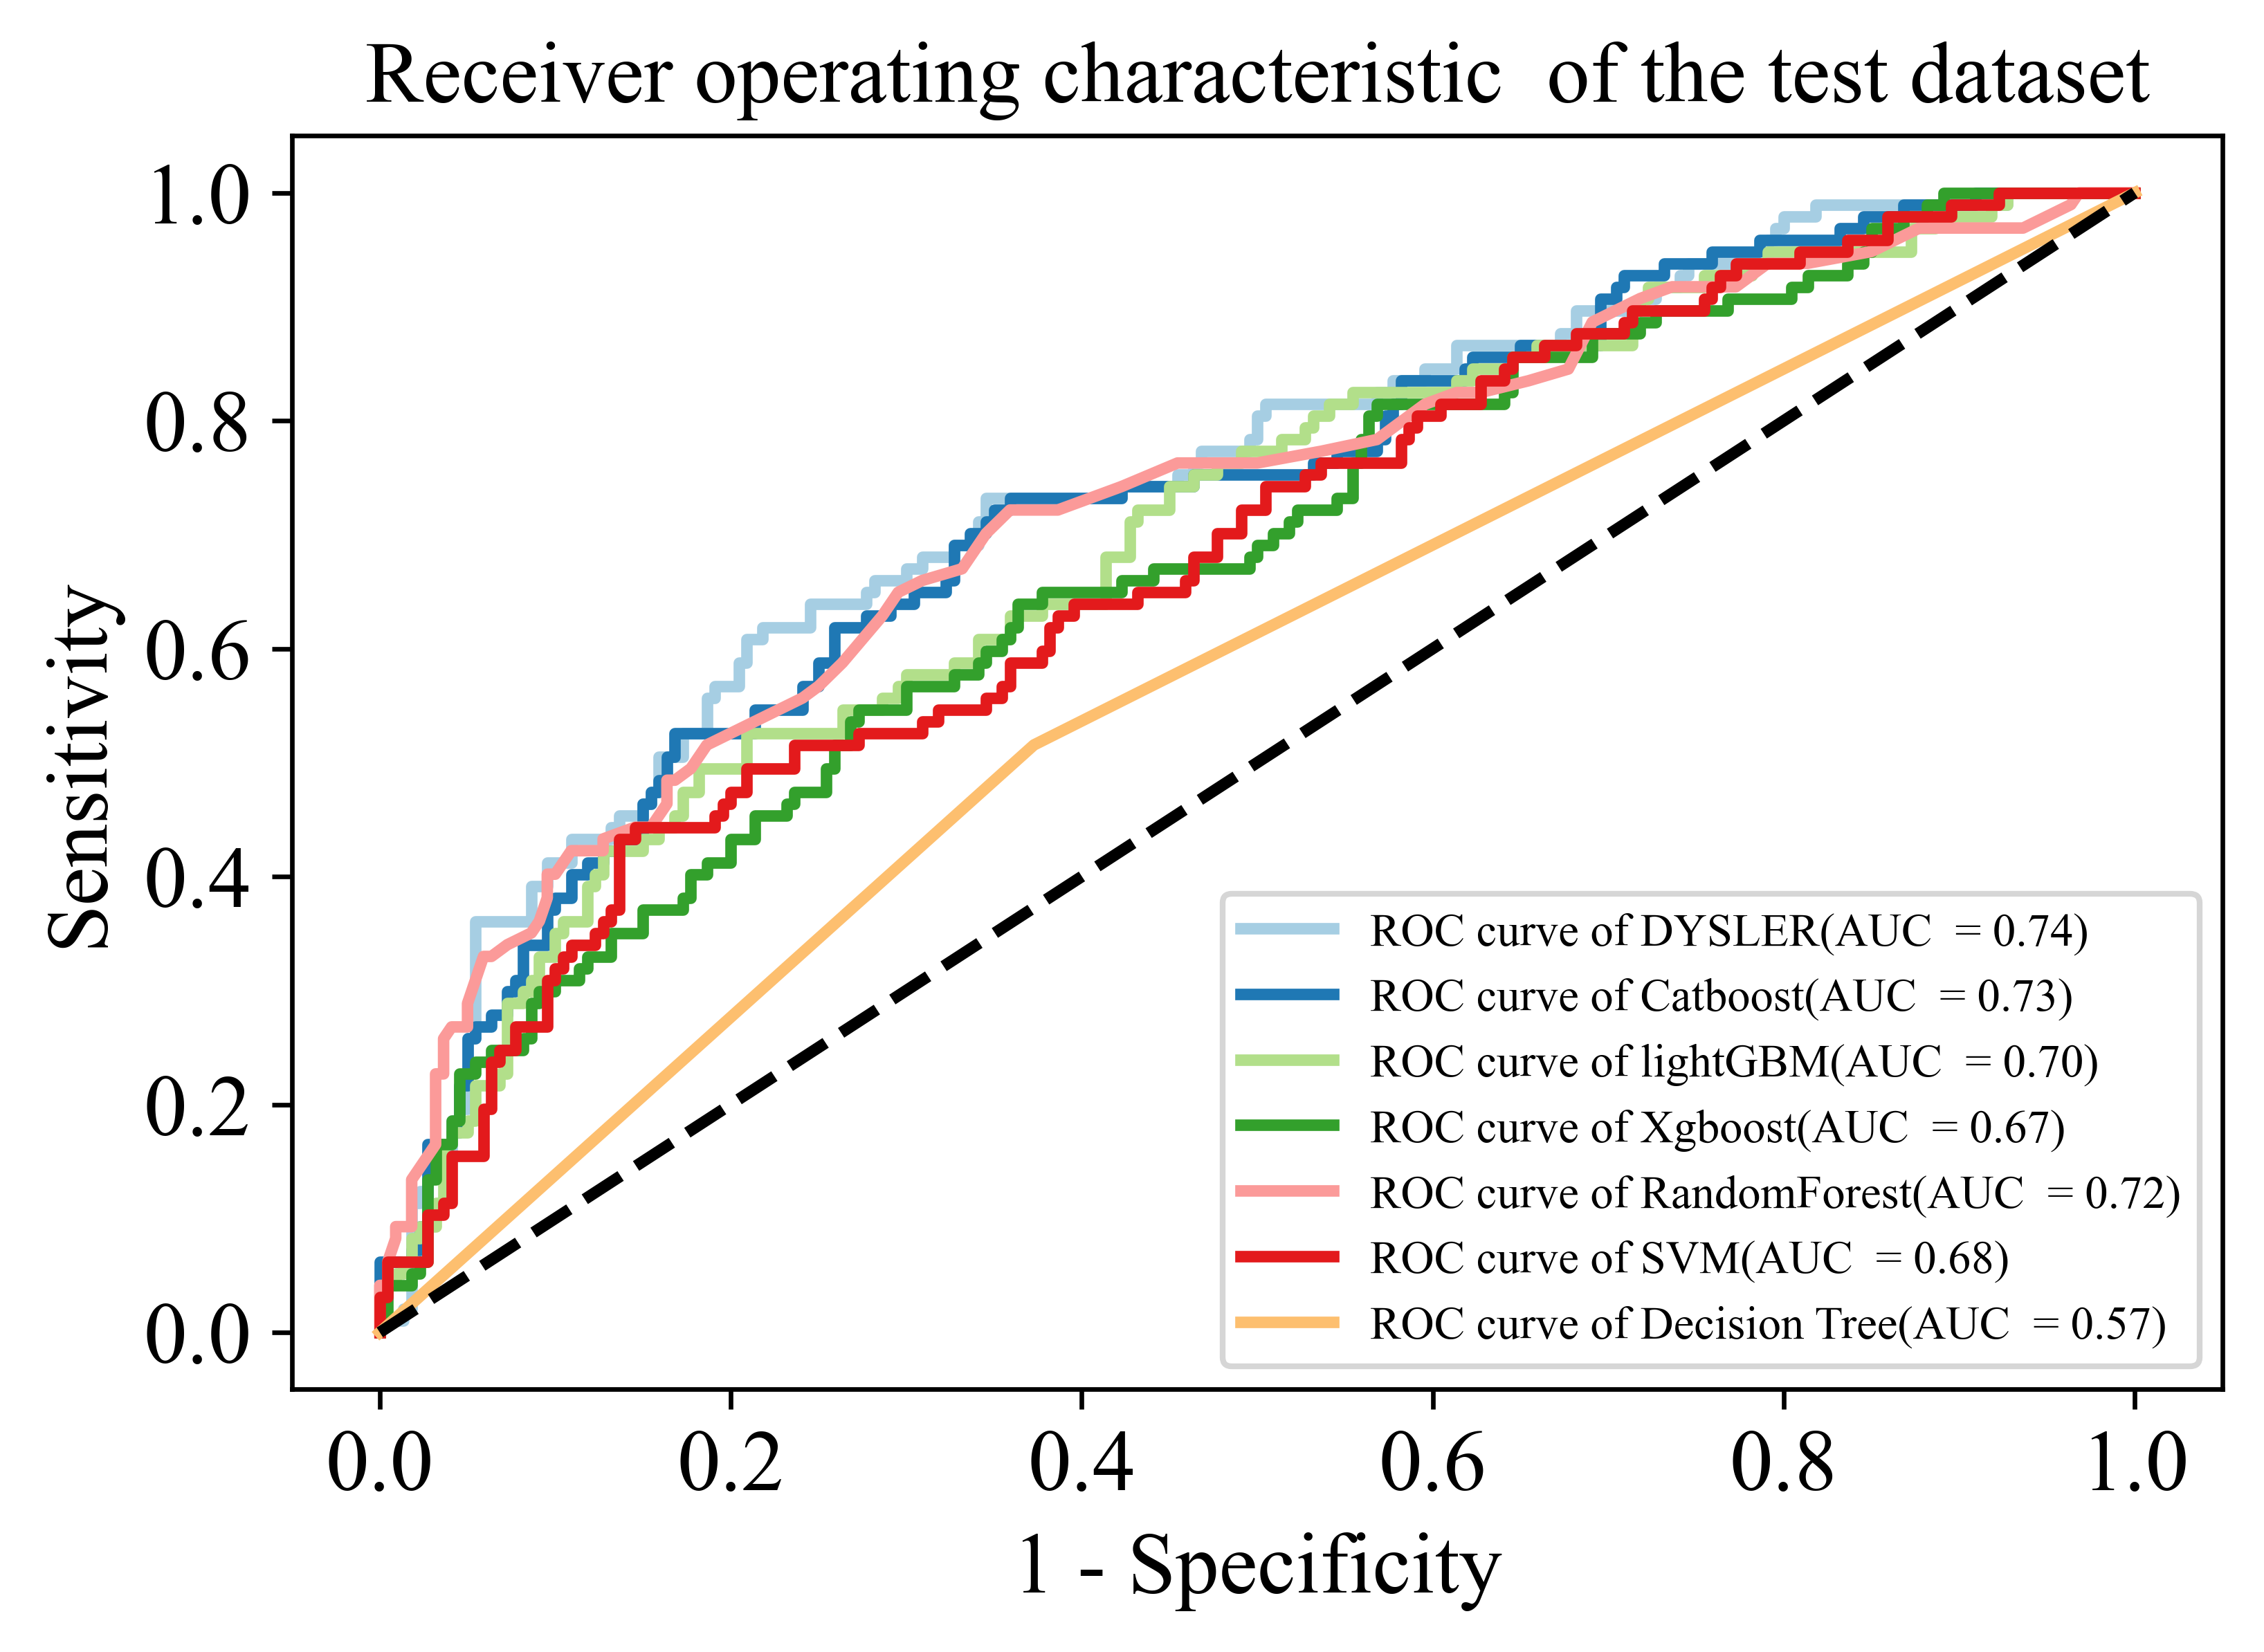

In [27]:
FPR, Recall, thresholds = ROC(labels_test,dd.iloc[:,0],pos_label=1)
area = roc_auc_score(labels_test,dd.iloc[:,0])
FPR1, Recall1, thresholds1 = ROC(labels_test,dd.iloc[:,1],pos_label=1)
area1 = roc_auc_score(labels_test,dd.iloc[:,1])
FPR2, Recall2, thresholds2 = ROC(labels_test,dd.iloc[:,2],pos_label=1)
area2 = roc_auc_score(labels_test,dd.iloc[:,2])
FPR3, Recall3, thresholds3 = ROC(labels_test,dd.iloc[:,3],pos_label=1)
area3 = roc_auc_score(labels_test,dd.iloc[:,3])
FPR4, Recall4, thresholds4 = ROC(labels_test,dd.iloc[:,4],pos_label=1)
area4 = roc_auc_score(labels_test,dd.iloc[:,4])
FPR5, Recall5, thresholds5 = ROC(labels_test,dd.iloc[:,5],pos_label=1)
area5 = roc_auc_score(labels_test,dd.iloc[:,5])
FPR6, Recall6, thresholds6 = ROC(labels_test,dd.iloc[:,6],pos_label=1)
area6 = roc_auc_score(labels_test,dd.iloc[:,6])
plt.figure(dpi=600,figsize=(6,4))
plt.tick_params(labelsize=15)
plt.plot(FPR, Recall, color=plt.get_cmap('Paired')(0),
         label='ROC curve of DYSLER(AUC  = %.2f)' % area,linewidth=2)
plt.plot(FPR1, Recall1, color=plt.get_cmap('Paired')(1),
         label='ROC curve of Catboost(AUC  = %.2f)' % area1,linewidth=2)
plt.plot(FPR2, Recall2, color=plt.get_cmap('Paired')(2),
         label='ROC curve of lightGBM(AUC  = %.2f)' % area2,linewidth=2)
plt.plot(FPR3, Recall3, color=plt.get_cmap('Paired')(3),
         label='ROC curve of Xgboost(AUC  = %.2f)' % area3,linewidth=2)
plt.plot(FPR4, Recall4, color=plt.get_cmap('Paired')(4),
         label='ROC curve of RandomForest(AUC  = %.2f)' % area4,linewidth=2)
plt.plot(FPR5, Recall5, color=plt.get_cmap('Paired')(5),
         label='ROC curve of SVM(AUC  = %.2f)' % area5,linewidth=2)
plt.plot(FPR6, Recall6, color=plt.get_cmap('Paired')(6),
         label='ROC curve of Decision Tree(AUC  = %.2f)' % area6,linewidth=2)

plt.plot([0, 1], [0, 1], color='black', linestyle='--',linewidth=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1 - Specificity',fontsize=15)
plt.ylabel('Sensitivity',fontsize=15)
plt.title('Receiver operating characteristic  of the test dataset',fontsize=15)
plt.legend(fontsize=8,loc="lower right")
plt.savefig('roc_1026.pdf',dpi=900,bbox_inches='tight')

In [18]:
dd

,DYSLER,Catboost,lightGBM,Xgboost,RandomForest,SVM,Decision Tree
0,0.601464,0.661677,0.555141,0.331584,0.72,0.374005,1.0
1,0.540168,0.702338,0.819047,0.964756,0.74,0.372314,0.0
2,0.520462,0.675890,0.562473,0.769898,0.66,0.372578,1.0
3,0.389297,0.313545,0.128283,0.173584,0.41,0.371534,0.0
4,0.367203,0.328434,0.156978,0.407809,0.34,0.372480,1.0
...,...,...,...,...,...,...,...
312,0.252196,0.093889,0.062543,0.010303,0.12,0.374875,0.0
313,0.479754,0.582090,0.305322,0.628655,0.54,0.372172,1.0
314,0.668439,0.862139,0.955197,0.990966,0.84,0.372481,1.0
315,0.231178,0.175186,0.074868,0.100834,0.25,0.372190,0.0


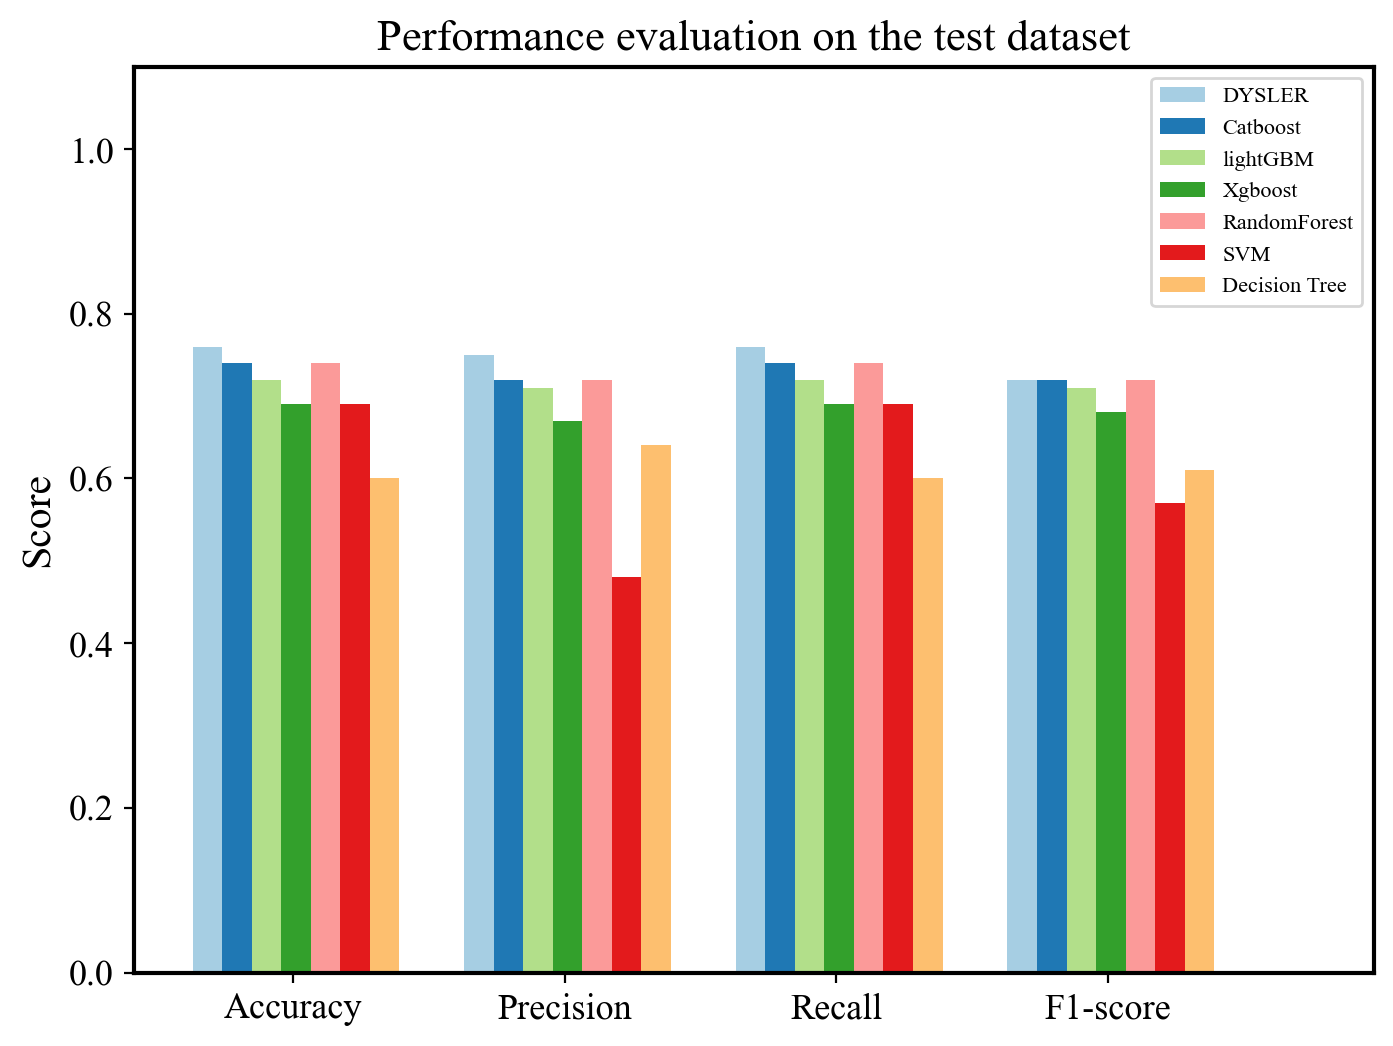

In [9]:
plt.rc('font',family='Times New Roman')
#plt.style.use(['science','bmh','no-latex'])

plt.rcParams['axes.facecolor']='white'

labels = ['Accuracy',"Precision", "Recall","F1-score"]
DYSLER = [0.76,0.75 ,     0.76,      0.72]
Catboost = [0.74,0.72,      0.74,      0.72]
lightGBM = [0.72,0.71,      0.72,      0.71]
Xgboost = [0.69,0.67,      0.69 ,     0.68 ]
RandomForest = [0.74, 0.72,      0.74,      0.72]
SVM=[0.69,0.48,      0.69,      0.57]
DecisionTree=[0.60,0.64,      0.60,      0.61 ]


x = np.arange(len(labels))*2.3
width = .25
fig,ax = plt.subplots(figsize=(8,6),dpi=200)
ax.axis([-0.5,10.0,0,1.1])
ax.tick_params(bottom=True, top=False, left=True, right=False)
bar_model = ax.bar(x+width/2, DYSLER,width,label='DYSLER',color=plt.get_cmap('Paired')(0))
bar_a = ax.bar(x+width*3/2, Catboost, width,label='Catboost',color=plt.get_cmap('Paired')(1))
bar_b = ax.bar(x+width*5/2, lightGBM,width,label='lightGBM',color=plt.get_cmap('Paired')(2))
bar_c = ax.bar(x+width*7/2, Xgboost,width,label='Xgboost',color=plt.get_cmap('Paired')(3))
bar_d = ax.bar(x+width*9/2, RandomForest,width,label='RandomForest',color=plt.get_cmap('Paired')(4))
bar_e = ax.bar(x+width*11/2, SVM,width,label='SVM',color=plt.get_cmap('Paired')(5))
bar_f = ax.bar(x+width*13/2, DecisionTree,width,label='Decision Tree',color=plt.get_cmap('Paired')(6))

ax.set_xticks(x+0.85)
plt.tick_params(labelsize=13)
ax.set_xticklabels(labels,size=13)
ax.legend()    

ax.grid(False)
ax.legend(loc='best', fontsize=8)
#minorticks_off()
#ax.get_legend().remove()
ax.set_ylabel('Score',fontsize=15)
ax.set_title('Performance evaluation on the test dataset',fontsize=16)

ax1 =plt.gca()
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
plt.savefig('Performance_evaluation.pdf',dpi=900,bbox_inches='tight')
plt.show()